In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

In [2]:
df=pd.read_csv("PBL5recommendationdata.csv",encoding="ISO-8859-1")

In [3]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,...,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Basic-Rollators-For-Adults-With-Seat-Green-6-W...,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E0149 +E0156,1.0,NaN,0.0,NaN,136.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,24.80,7.50,30.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0,23,3,John,Smith,Company1,23,NaN,NaN,NaN,USD,NaN,20.00,NaN,9.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.99,NaN,fedex,11|Ground,NaN,NaN,NaN,1.28597E+14,3.0,1.386090e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Urinary-Drain-Bags0000,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,Rx,Yes,NaN,NaN,NaN,https://medline360.medline.com:443/irj/servlet...,508f2d75-582e-2e10-2eab-d83980a9b1d0,A4357,1.0,NaN,0.0,OFF sale cause it is an RX item,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,8.00,7.00,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0,9531,3,John,Smith,Company1,9531,NaN,NaN,NaN,USD,NaN,68.78,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.73,NaN,manual,0|Standard Shipping,NaN,NaN,NaN,NaN,3.0,1.449604e+09,genlee166,authorize.net,NaN,...,NaN,NaN,NaN,NaN,SensiCare-Nitrile-Exam-GlovesBlueXX-Large,0.0,CS,800 Each / Case,NaN,1 CS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,800.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.23,10.04,10.24,NaN,NaN,NaN,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437762646,0.0,29,4,James,Anderson,NaN,29,NaN,Ebay,NaN,USD,NaN,19.56,0.0,9.95,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,29.55,NaN,NaN,11|Ground,NaN,NaN,NaN,7.96468E+14,3.0,1.386780e+09,NaN,NaN,Credit Card,...,NaN,NaN,NaN,NaN,Basket-for-2-Butt

In [4]:
df.shape

(4194, 181)

In [5]:
df.tail()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,...,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
4189,3730,Nora,Fontana,NaN,1463408698,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1463408698,0.0,17421,3730,Nora,Fontana,NaN,17421,NaN,NaN,NaN,USD,NaN,14.85,1.21,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.463409e+09,NaN,paypal,PayPal,...,Shop CareLineMedical.com For the Top Rated Med...,"barf bag, emesis bags, vomit bags, barf bags, ...",NaN,NaN,Emesis-BagsBlue-2,0.0,PK,24 Each / Pack,NaN,1 PK,NaN,NaN,NaN,NaN,Yes,8.843890e+11,NaN,NaN,NaN,NaN,NO CODE - PRODUCT DOES NOT MEET HCPCS SPECIFIC...,24.0,NaN,1.0,NaN,418.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,5.00,5.00,7.00,NaN,NaN,NaN,NaN,NaN,NaN,Plastic Rim,NaN,NaN,NaN,PF06157,3.0,NaN
4190,3732,Kennithe,Tecora,NaN,1463412756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1463412756,NaN,17425,3732,Kennithe,Tecora,NaN,17425,NaN,NaN,NaN,USD,NaN,39.99,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.463413e+09,Berry,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Bed-Assist-Bar,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,NaN,Yes,8.843890e+11,NaN,NaN,NaN,NaN,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,1.0,NaN,0.0,NaN,128.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,14.60,4.10,18.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF08485,3.0,NaN
4191,3733,Tinna,Randall,NaN,1463413245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1463413245,NaN,17426,3733,Tinna,Randall,NaN,17426,NaN,NaN,NaN,USD,NaN,1099.00,0.00,NaN,32.0,109.9,NaN,NaN,NaN,NaN,NaN,NaN,989.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.463413e+09,Berry,authorize.net,NaN,...,NaN,power scooter; electric power scooter; electri...,NaN,NaN,Spitfire-EX-Travel-4-Wheel-Mobility-Scooter-21...,0.0,EA,NaN,NaN,NaN,42.0,20.0,35.0,No,Not Made With Natura,8.223830e+11,NaN,NaN,http://www.drivemedical.com/product-manuals/sp...,NaN,K0800,NaN,NaN,0.0,NaN,128.0,1099.00,NaN,Limited Lifetime on Frame; 14 Month Limited on...,0.0,NaN,Universal,Basic Assembly Required,No Installation Required,45.00,20.75,20.75,127.0,Ships Same Day,https://www.drivemedical.com/power-mobility/sp...,NaN,21AH Batteries,NaN,NaN,NaN,NaN,NaN,PM36,3.0,NaN
4192,3735,HALIMAH,SHAHID,NaN,1463416687,NaN,1.0,NaN,Na

In [6]:
df.sample(9)

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,...,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
3809,3365,Sam,Holleman,NaN,1461595349,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1461595349,0.0,16071,3365,Sam,Holleman,NaN,16071,NaN,NaN,NaN,USD,NaN,314.99,0.00,9.95,32.0,31.5,NaN,NaN,NaN,NaN,NaN,NaN,293.44,NaN,fedex,11|Ground,NaN,NaN,NaN,1.02633E+14,3.0,1.461595e+09,NaN,paypal,PayPal,...,NaN,NaN,NaN,NaN,Freedom-Transport-ChairsRed-2,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,NaN,NaN,8.019630e+10,NaN,NaN,NaN,30242547-8701-2f10-9292-e32a80da42b4,E1038,1.0,NaN,0.0,NaN,136.0,155.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,33.0,9.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF21895,0.0,NaN
514,433,Dosinda,Perez,NaN,1415752576,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1437763386,0.0,2108,433,Dosinda,Perez,NaN,2108,NaN,NaN,NaN,USD,NaN,16.49,NaN,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.44,NaN,fedex,11|Ground,NaN,NaN,NaN,4.8383E+14,3.0,1.415753e+09,NaN,authorize.net,NaN,...,Shop CareLineMedical.com For the Top Rated Med...,"barf bag, emesis bags, vomit bags, barf bags, ...",NaN,NaN,Emesis-BagsBlue-2,0.0,PK,24 Each / Pack,NaN,1 PK,NaN,NaN,NaN,NaN,Yes,8.843890e+11,NaN,NaN,NaN,NaN,NO CODE - PRODUCT DOES NOT MEET HCPCS SPECIFIC...,24.0,NaN,1.0,NaN,418.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,5.0,5.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,Plastic Rim,NaN,NaN,NaN,PF06157,3.0,NaN
1306,1050,Rodney,Erickson,NaN,1431957138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437559566,0.0,4275,1050,Rodney,Erickson,NaN,4275,NaN,NaN,NaN,USD,NaN,90.99,0.00,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.94,NaN,fedex,11|Ground,NaN,NaN,NaN,6.87398E+14,3.0,1.431957e+09,abe,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Padded-Transfer-Benches-3,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,NaN,Yes,8.019618e+10,NaN,NaN,NaN,NaN,E0248,1.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.6,16.2,27.9,NaN,NaN,NaN,NaN,NaN,NaN,Aluminum,NaN,NaN,NaN,PF04727,NaN,NaN
1690,1394,Robart,Downing,NaN,1438957151,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1456953356,0.0,5396,1394,Robart,Downing,NaN,5396,NaN,NaN,NaN,USD,NaN,126.03,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.03,NaN,NaN,11|Ground,NaN,NaN,NaN,4.8383E+14,3.0,1.438957e+09,abe,authorize.net,NaN,...,Lightweight and durable t

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


In [8]:
df.isnull().sum()

Customers.id                0
Customers.fname             0
Customers.lname             0
Customers.company        3467
Customers.create_date       0
                         ... 
Products.leg_style       4194
Products.seat_size       4032
Products.family_id        325
Products.saved_status     264
Products.freight_cost    4194
Length: 181, dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.dropna(axis=1,how="any",inplace=True)##Boş olan verileri yerinde silme.
                                        ##Sadece dolular kaldı.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customers.id              4194 non-null   int64  
 1   Customers.fname           4194 non-null   object 
 2   Customers.lname           4194 non-null   object 
 3   Customers.create_date     4194 non-null   int64  
 4   Customers.last_modified   4194 non-null   int64  
 5   Orders.id                 4194 non-null   int64  
 6   Orders.customer_id        4194 non-null   int64  
 7   Orders.fname              4194 non-null   object 
 8   Orders.lname              4194 non-null   object 
 9   Orders.order_number       4194 non-null   object 
 10  Orders.currency           4194 non-null   object 
 11  Orders.subtotal           4194 non-null   float64
 12  Orders.total              4194 non-null   float64
 13  Orders.status             4194 non-null   int64  
 14  Orders.p

In [12]:
df.sample(5)

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.last_modified,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.order_number,Orders.currency,Orders.subtotal,Orders.total,Orders.status,Orders.placed_date,Order_Items.id,Order_Items.parent,Order_Items.product_name,Order_Items.qty,Order_Items.price
3953,3488,Mary,Sterling,1462287175,1462287175,16450,3488,Mary,Sterling,16450,USD,53.03,62.98,1,1462287177,19135,16450,Inflatable Exercise Ball - Accessory - Small B...,1,13.13
417,374,Stewart,tauscher,1412538676,1437763605,1866,374,Stewart,tauscher,1866,USD,113.39,116.30,1,1412538676,3303,1866,K1 Basic Wheelchairs,1,113.39
3032,2599,Kathryn,Cox,1456179598,1456953281,13111,2599,Kathryn,Cox,13111,USD,121.43,119.24,1,1456179681,15519,13111,"Extrasorbs Extra Strong Disposable Drypads, Wh...",1,121.43
3365,2902,MINNESOTA,CRANIOFACIAL CENTER,1458575357,1458575357,14347,2902,MINNESOTA,CRANIOFACIAL CENTER,14347,USD,85.15,86.58,1,1458575359,16851,14347,"IOMED&reg; disposable electrodes - IOGEL, smal...",1,85.15
738,586,Steephanie,Bowser,1420813693,1437762721,3087,586,Steephanie,Bowser,3087,USD,193.79,184.10,1,1420813797,4563,3087,"Otter Pediatric Bathing System, Medium",1,193.79


In [13]:
df=df.drop(["Customers.create_date","Customers.last_modified","Orders.customer_id","Orders.order_number","Orders.currency","Orders.placed_date","Order_Items.id","Order_Items.parent"],axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customers.id              4194 non-null   int64  
 1   Customers.fname           4194 non-null   object 
 2   Customers.lname           4194 non-null   object 
 3   Orders.id                 4194 non-null   int64  
 4   Orders.fname              4194 non-null   object 
 5   Orders.lname              4194 non-null   object 
 6   Orders.subtotal           4194 non-null   float64
 7   Orders.total              4194 non-null   float64
 8   Orders.status             4194 non-null   int64  
 9   Order_Items.product_name  4194 non-null   object 
 10  Order_Items.qty           4194 non-null   int64  
 11  Order_Items.price         4194 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 393.3+ KB


In [16]:
df=df[["Order_Items.qty","Orders.total"]]

In [17]:
df.head()

,Order_Items.qty,Orders.total
0,1,64.29
1,4,29.99
2,1,78.73
3,1,29.55
4,1,46.00


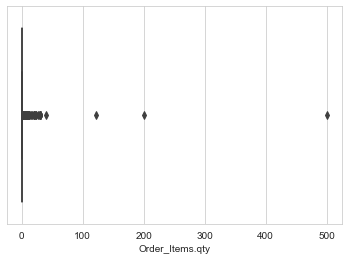

In [19]:
sns.boxplot(df["Order_Items.qty"]);

In [20]:
df[df["Order_Items.qty"]<100]

,Order_Items.qty,Orders.total
0,1,64.29
1,4,29.99
2,1,78.73
3,1,29.55
4,1,46.00
...,...,...
4189,1,16.06
4190,1,39.99
4191,1,989.10
4192,1,129.99


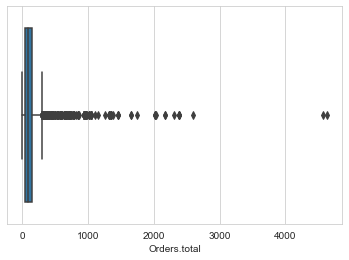

In [21]:
sns.boxplot(df["Orders.total"]);

In [22]:
df[df["Orders.total"]<2000]

,Order_Items.qty,Orders.total
0,1,64.29
1,4,29.99
2,1,78.73
3,1,29.55
4,1,46.00
...,...,...
4189,1,16.06
4190,1,39.99
4191,1,989.10
4192,1,129.99


In [33]:
model=KMeans(n_clusters=5)
model.fit(df)

KMeans(n_clusters=5)

In [34]:
pred=model.predict(df)

In [35]:
pred

array([1, 1, 1, ..., 3, 1, 1])

In [36]:
silhouette_score(df,pred)

0.6987390276904527

In [37]:
clust=df.assign(Cluster=model.labels_)
model.cluster_centers_.astype("int")
model.labels_

array([1, 1, 1, ..., 3, 1, 1])

No handles with labels found to put in legend.


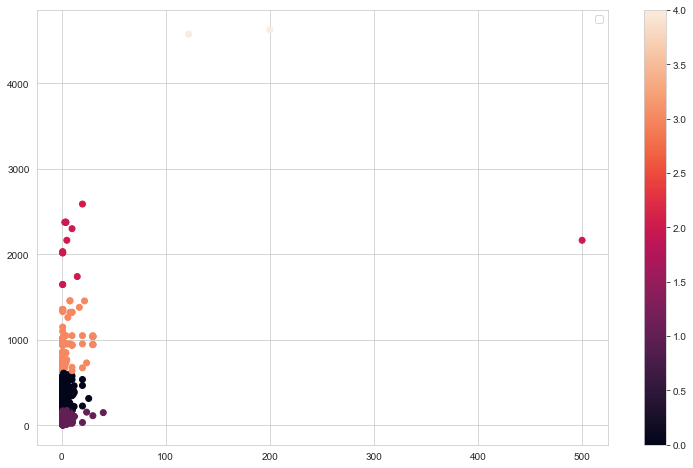

In [38]:
plt.figure(figsize=(12.8,8))
plt.scatter(df["Order_Items.qty"],df["Orders.total"],c=pred)
plt.legend()
plt.colorbar()
plt.show();

In [39]:
allscore=[]
allclusters=[]
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        pred=model.fit_predict(df)
        score=silhouette_score(df,pred)
        print(f"Number of cluster{no_of_cluster},silhouette{score}")
        allscore.append(score)
        allclusters.append(no_of_cluster)

clust(10)
    

Number of cluster2,silhouette0.8935757789618257
Number of cluster3,silhouette0.8612394718663198
Number of cluster4,silhouette0.7065716973888139
Number of cluster5,silhouette0.697833769366229
Number of cluster6,silhouette0.615778260582729
Number of cluster7,silhouette0.6258872810479622
Number of cluster8,silhouette0.6272583092542345
Number of cluster9,silhouette0.6130751078292518
Number of cluster10,silhouette0.5593525393935393


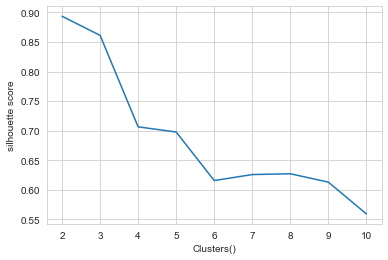

In [40]:
plt.plot(allclusters,allscore)
plt.xlabel("Clusters()")
plt.ylabel("silhouette score");

In [41]:
allscore= []
allclusters= []
sum_of_squared_distances= []
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        pred=model.fit_predict(df)
        sum_of_squared_distances.append(model.inertia_)
        score=silhouette_score(df,pred)
        print("Number of cluster {},silhouette {}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)

clust(9)

Number of cluster 2,silhouette 0.8935757789618257
Number of cluster 3,silhouette 0.8612394718663198
Number of cluster 4,silhouette 0.6927902844054279
Number of cluster 5,silhouette 0.6987390276904527
Number of cluster 6,silhouette 0.6167157791039113
Number of cluster 7,silhouette 0.6257809830257016
Number of cluster 8,silhouette 0.627339496426954
Number of cluster 9,silhouette 0.6133767606778201


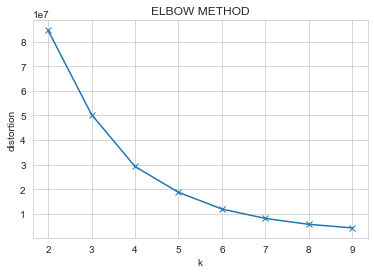

In [42]:
plt.plot(allclusters,sum_of_squared_distances,marker="x")
plt.xlabel("k")
plt.ylabel("distortion")
plt.title("ELBOW METHOD")
plt.show();